In [6]:

import tkinter as tk
from tkinter import filedialog
import numpy as np
import matplotlib.pyplot as plt
import os
from brukeropusreader import read_file
from scipy.signal import savgol_filter


In [7]:
def open_file_and_plot():
    root = tk.Tk()
    root.withdraw()  # Hide the main window

In [8]:
 file_path = filedialog.askopenfilename()

2024-03-09 17:19:00.499 python[32706:1189902] +[CATransaction synchronize] called within transaction
2024-03-09 17:19:00.521 python[32706:1189902] +[CATransaction synchronize] called within transaction
2024-03-09 17:19:13.424 python[32706:1189902] +[CATransaction synchronize] called within transaction


In [9]:
if file_path:
        # Reading the OPUS file
        opus_data = read_file(file_path)

In [10]:
 file_name = os.path.basename(file_path)

In [11]:
absorbance = opus_data['AB']

In [12]:

start_wn = opus_data['AB Data Parameter']['FXV']
end_wn = opus_data['AB Data Parameter']['LXV']
num_points = opus_data['AB Data Parameter']['NPT']

In [13]:
num_points = len(absorbance)

In [14]:
wavenumbers = np.linspace(start_wn, end_wn, num_points)

In [15]:
assert len(wavenumbers) == len(absorbance), "Wavenumbers and absorbance arrays must be the same length."

In [16]:
baseline_corrected = savgol_filter(absorbance, 10000, 0)  # You can adjust the window size and polynomial order
corrected_absorbance = absorbance - baseline_corrected

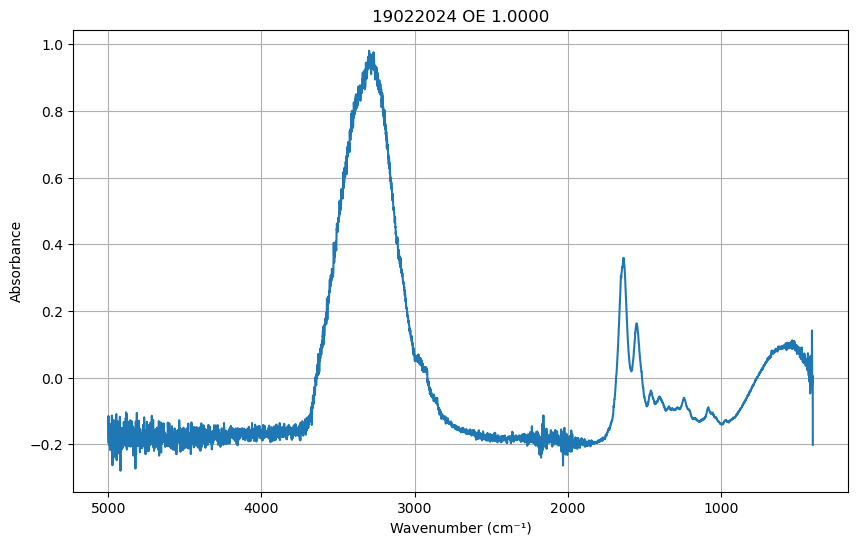

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers, corrected_absorbance)
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title(file_name)  # Using the file name as the title
plt.grid(True)
plt.gca().invert_xaxis()  # Inverting the x-axis as wavenumbers typically decrease
plt.show()
open_file_and_plot()


In [18]:
# Finden des minimalen und maximalen Absorptionswerts
# Standarnormalization
min_absorbance = min(corrected_absorbance)
max_absorbance = max(corrected_absorbance) # hier wenn man die baseline correction will mit corrected_absorbance

# Normalisieren der absorbance Daten auf den Bereich [0, 1]
normalized_absorbance = (corrected_absorbance - min_absorbance) / (max_absorbance - min_absorbance)


In [19]:
a = 0  # Neuer minimaler Wert
b = 1  # Neuer maximaler Wert

# Normalisieren der absorbance Daten auf den Bereich [a, b]
normalized_absorbance = a + (corrected_absorbance - min_absorbance) * (b - a) / (max_absorbance - min_absorbance)


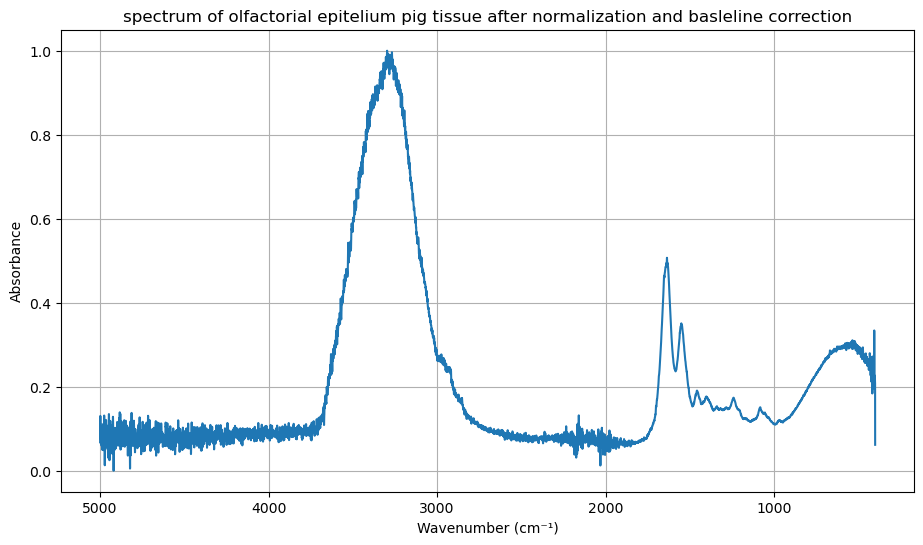

In [28]:
plt.figure(figsize=(11, 6))
plt.plot(wavenumbers, normalized_absorbance)
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title('spectrum of olfactorial epitelium pig tissue after normalization and basleline correction')  # Using the file name as the title file_name
plt.grid(True)
plt.gca().invert_xaxis()  # Inverting the x-axis as wavenumbers typically decrease
plt.show()
open_file_and_plot()
